# Bab 6: Decision Trees (Pohon Keputusan)

### 1. Pendahuluan

Bab 6 membahas *Decision Trees*, sebuah model *Machine Learning* yang serbaguna dan mampu melakukan tugas klasifikasi dan regresi. Pohon Keputusan adalah model yang sangat kuat dan mudah diinterpretasikan (*white box model*), serta menjadi komponen dasar dari algoritma yang lebih canggih seperti *Random Forests*.

---

### 2. Melatih dan Memvisualisasikan Pohon Keputusan

Pohon Keputusan dapat dilatih dengan menggunakan kelas `DecisionTreeClassifier` dari Scikit-Learn. Setelah dilatih, salah satu keunggulan utamanya adalah model ini dapat divisualisasikan untuk memahami bagaimana ia membuat keputusan.

Setiap *node* dalam pohon mengajukan pertanyaan tentang sebuah fitur. Berdasarkan jawabannya, kita akan bergerak ke cabang berikutnya hingga mencapai *node* akhir (*leaf node*), yang memberikan prediksi kelas.

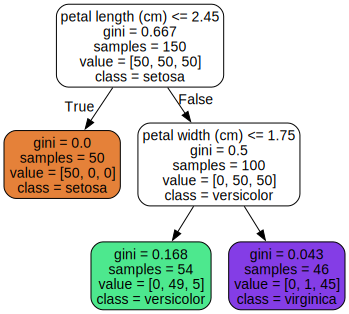

In [1]:
!pip install graphviz

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Memuat dataset Iris
iris = load_iris()
X = iris.data[:, 2:] # petal length dan width
y = iris.target

# Melatih model DecisionTreeClassifier dengan kedalaman maksimum 2
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

# Mengekspor model ke format .dot untuk visualisasi
dot_data = export_graphviz(
        tree_clf,
        out_file=None,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

# Memvisualisasikan pohon
graph = graphviz.Source(dot_data)
graph

Output dari sel di atas adalah visualisasi pohon keputusan. Anda bisa melihat kondisi di setiap node (misalnya, petal width (cm) <= 0.8), nilai Gini, jumlah samples, dan kelas prediksi.

---

### 3. Membuat Prediksi dan Estimasi Probabilitas Kelas

Membuat prediksi dengan Pohon Keputusan melibatkan traversal pohon dari root node ke leaf node dengan mengikuti kondisi yang relevan. Setelah mencapai leaf node, pohon akan memprediksi kelas yang paling dominan di sana.

Selain itu, Pohon Keputusan juga dapat mengestimasi probabilitas suatu instance termasuk dalam kelas tertentu. Probabilitas dihitung berdasarkan proporsi instance training dari masing-masing kelas di leaf node yang dicapai.

In [2]:
# Misalkan kita punya bunga dengan petal length 5cm dan petal width 1.5cm
# Prediksi probabilitas kelas
probabilities = tree_clf.predict_proba([[5, 1.5]])
print("Estimasi Probabilitas:", probabilities)

# Prediksi kelas
predicted_class = tree_clf.predict([[5, 1.5]])
print("Prediksi Kelas:", predicted_class)
print(f"Nama Kelas: {iris.target_names[predicted_class[0]]}")

Estimasi Probabilitas: [[0.         0.90740741 0.09259259]]
Prediksi Kelas: [1]
Nama Kelas: versicolor


---

### 4. Algoritma Pelatihan CART (The CART Training Algorithm)

Scikit-Learn menggunakan algoritma CART (Classification And Regression Tree). Algoritma ini bersifat greedy; ia mencari pemisahan (split) terbaik di setiap level tanpa mempertimbangkan apakah pemisahan tersebut akan menghasilkan solusi optimal secara global.

Untuk klasifikasi, CART mencoba meminimalkan Gini impurity. Tujuannya adalah menghasilkan subset yang paling "murni".
Untuk regresi, CART mencoba meminimalkan Mean Squared Error (MSE).
Gini Impurity:
$$G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2$$
di mana $p_{i,k}$ adalah rasio instance kelas $k$ di node $i$.

---

### 5. Regularisasi Hyperparameter

Pohon Keputusan sangat rentan terhadap overfitting. Untuk mengaturnya, digunakan hyperparameter regularisasi seperti:

max_depth: Membatasi kedalaman maksimum pohon.
min_samples_split: Jumlah minimum sampel yang harus dimiliki sebuah node agar dapat dibagi.
min_samples_leaf: Jumlah minimum sampel yang harus dimiliki sebuah leaf node.
max_leaf_nodes: Jumlah maksimum leaf node.
Meningkatkan min_* atau mengurangi max_* hyperparameter akan meregularisasi model dan mencegah overfitting.

---

### 6. Regresi dengan Pohon Keputusan

Pohon Keputusan juga dapat digunakan untuk tugas regresi. Prediksi di setiap leaf node adalah nilai rata-rata dari target instance yang ada di node tersebut. Fungsi biaya yang diminimalkan adalah MSE.

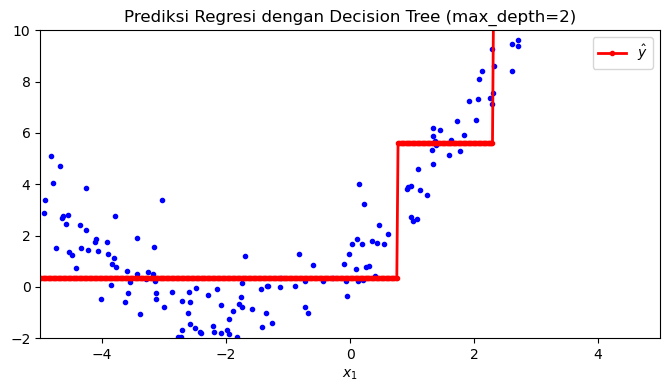

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Membuat data kuadratik dengan noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1) * 10 - 5
y = 0.5 * X**2 + 2 * X + 1 + np.random.randn(m, 1)

# Melatih model DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[-5, 5, -2, 10]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel(r"$x_1$") # Corrected line
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$") # Corrected line

# Plot hasil prediksi
plt.figure(figsize=(8, 4))
plot_regression_predictions(tree_reg, X, y)
plt.title("Prediksi Regresi dengan Decision Tree (max_depth=2)")
plt.legend()
plt.show()


Plot di atas menunjukkan karakteristik utama dari regresi dengan Decision Tree: prediksi model adalah nilai konstan di dalam setiap wilayah (daun), menghasilkan bentuk seperti tangga.

---

### 7. Keterbatasan Pohon Keputusan
* Sensitif terhadap Rotasi Data: Pohon Keputusan hanya dapat membuat pemisahan yang tegak lurus terhadap sumbu fitur, sehingga peka terhadap rotasi data.
* Sensitif terhadap Variasi Kecil pada Data (High Variance): Perubahan kecil dalam data pelatihan dapat menyebabkan perubahan besar pada struktur pohon. Hal ini menjadi motivasi untuk menggunakan Ensemble Methods seperti Random Forests.